<a href="https://colab.research.google.com/github/MattWroclaw/data-science-bootcamp/blob/main/Analiza_danyh_pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)

1.25.2
2.0.3


##Załadowanie danych
za pomocą pandas_datareader.data

In [83]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-07-05 to 2019-07-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [7]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-05,198.6500,200.5500,198.1700,200.000,39858885
2024-07-03,199.9400,200.0290,196.7601,197.590,31597926
2024-07-02,197.2800,200.4300,195.9300,200.000,45600013
2024-07-01,193.4900,198.2957,192.8200,197.200,41192011
2024-06-28,197.7300,198.8500,192.5000,193.250,76930192
...,...,...,...,...,...
2019-07-12,100.4140,100.8500,100.1940,100.550,50185940
2019-07-11,101.2810,101.7900,99.7650,100.054,86355320
2019-07-10,99.8255,101.2470,99.7700,100.870,98638040


In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-05,198.65,200.5500,198.1700,200.00,39858885
2024-07-03,199.94,200.0290,196.7601,197.59,31597926
2024-07-02,197.28,200.4300,195.9300,200.00,45600013
2024-07-01,193.49,198.2957,192.8200,197.20,41192011
2024-06-28,197.73,198.8500,192.5000,193.25,76930192


In [9]:
df.tail(8)

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-17,100.3520,100.6000,99.6015,99.6015,51176180
2019-07-16,100.5290,101.3160,100.0610,100.4950,52363960
2019-07-15,101.0700,101.1450,100.0780,101.0500,59626860
2019-07-12,100.4140,100.8500,100.1940,100.5500,50185940
2019-07-11,101.2810,101.7900,99.7650,100.0540,86355320
2019-07-10,99.8255,101.2470,99.7700,100.8700,98638040
2019-07-09,97.3900,99.5005,97.1740,99.4150,86913960
2019-07-08,96.7060,97.8000,96.4125,97.6160,57667420


In [11]:
# nazwy kolumn
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
# zamiana na lower-case nazw kolumn
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [13]:
df.head(4)

,open,high,low,close,volume
Date,,,,,
2024-07-05,198.65,200.5500,198.1700,200.00,39858885
2024-07-03,199.94,200.0290,196.7601,197.59,31597926
2024-07-02,197.28,200.4300,195.9300,200.00,45600013
2024-07-01,193.49,198.2957,192.8200,197.20,41192011


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,136.588759,138.250944,134.833402,136.567882,7.097610e+07
std,31.512154,31.714361,31.246964,31.463030,3.301476e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,104.580000,106.837500,103.366275,105.501250,4.959959e+07
50%,140.930000,143.565000,139.270000,140.720000,6.239747e+07
75%,163.816750,165.564750,161.812750,163.617000,8.350106e+07
max,199.940000,200.550000,198.170000,200.000000,3.113457e+08


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.365888e+02,3.151215e+01,8.207550e+01,1.045800e+02,1.409300e+02,1.638168e+02,1.999400e+02
high,1258.0,1.382509e+02,3.171436e+01,8.348000e+01,1.068375e+02,1.435650e+02,1.655648e+02,2.005500e+02
low,1258.0,1.348334e+02,3.124696e+01,8.130160e+01,1.033663e+02,1.392700e+02,1.618127e+02,1.981700e+02
close,1258.0,1.365679e+02,3.146303e+01,8.182000e+01,1.055012e+02,1.407200e+02,1.636170e+02,2.000000e+02
volume,1258.0,7.097610e+07,3.301476e+07,1.762674e+07,4.959959e+07,6.239747e+07,8.350106e+07,3.113457e+08


##Selekcja kolumn

In [16]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-07-05,198.650,200.5500,198.1700,200.00,39858885
2024-07-03,199.940,200.0290,196.7601,197.59,31597926
2024-07-02,197.280,200.4300,195.9300,200.00,45600013
2024-07-01,193.490,198.2957,192.8200,197.20,41192011
2024-06-28,197.730,198.8500,192.5000,193.25,76930192
2024-06-27,195.005,199.8400,194.2000,197.85,74397491
2024-06-26,186.920,194.8000,186.2600,193.61,65103893
2024-06-25,186.810,188.8400,185.4200,186.34,45898475
2024-06-24,189.330,191.0000,185.3300,185.57,50610379


In [17]:
df['open']

Date
2024-07-05    198.650
2024-07-03    199.940
2024-07-02    197.280
2024-07-01    193.490
2024-06-28    197.730
2024-06-27    195.005
2024-06-26    186.920
2024-06-25    186.810
2024-06-24    189.330
2024-06-21    187.800
Name: open, dtype: float64

In [18]:
df.open

Date
2024-07-05    198.650
2024-07-03    199.940
2024-07-02    197.280
2024-07-01    193.490
2024-06-28    197.730
2024-06-27    195.005
2024-06-26    186.920
2024-06-25    186.810
2024-06-24    189.330
2024-06-21    187.800
Name: open, dtype: float64

In [19]:
df[['open']]

,open
Date,
2024-07-05,198.650
2024-07-03,199.940
2024-07-02,197.280
2024-07-01,193.490
2024-06-28,197.730
2024-06-27,195.005
2024-06-26,186.920
2024-06-25,186.810
2024-06-24,189.330


In [22]:
df[['open', 'close']]

,open,close
Date,,
2024-07-05,198.650,200.00
2024-07-03,199.940,197.59
2024-07-02,197.280,200.00
2024-07-01,193.490,197.20
2024-06-28,197.730,193.25
2024-06-27,195.005,197.85
2024-06-26,186.920,193.61
2024-06-25,186.810,186.34
2024-06-24,189.330,185.57


In [23]:
df.iloc[:, 0]

Date
2024-07-05    198.650
2024-07-03    199.940
2024-07-02    197.280
2024-07-01    193.490
2024-06-28    197.730
2024-06-27    195.005
2024-06-26    186.920
2024-06-25    186.810
2024-06-24    189.330
2024-06-21    187.800
Name: open, dtype: float64

In [24]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-07-05,198.650,200.00
2024-07-03,199.940,197.59
2024-07-02,197.280,200.00
2024-07-01,193.490,197.20
2024-06-28,197.730,193.25
2024-06-27,195.005,197.85
2024-06-26,186.920,193.61
2024-06-25,186.810,186.34
2024-06-24,189.330,185.57


In [25]:
df.iloc[:, 1:3]
# 3 się nie wlicza, czyli są kol. o indexach 1,2

,high,low
Date,,
2024-07-05,200.5500,198.1700
2024-07-03,200.0290,196.7601
2024-07-02,200.4300,195.9300
2024-07-01,198.2957,192.8200
2024-06-28,198.8500,192.5000
2024-06-27,199.8400,194.2000
2024-06-26,194.8000,186.2600
2024-06-25,188.8400,185.4200
2024-06-24,191.0000,185.3300


wycięcie ostatniej kolumny -1


In [26]:
df.iloc[:, -1]

Date
2024-07-05    39858885
2024-07-03    31597926
2024-07-02    45600013
2024-07-01    41192011
2024-06-28    76930192
2024-06-27    74397491
2024-06-26    65103893
2024-06-25    45898475
2024-06-24    50610379
2024-06-21    72931754
Name: volume, dtype: int64

In [27]:
df.iloc[:, [-1]]
# teraz dostaniemy obiekt typu Series

,volume
Date,
2024-07-05,39858885
2024-07-03,31597926
2024-07-02,45600013
2024-07-01,41192011
2024-06-28,76930192
2024-06-27,74397491
2024-06-26,65103893
2024-06-25,45898475
2024-06-24,50610379


chcemy *3 ostatnie kolumny*


In [28]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-07-05,198.1700,200.00,39858885
2024-07-03,196.7601,197.59,31597926
2024-07-02,195.9300,200.00,45600013
2024-07-01,192.8200,197.20,41192011
2024-06-28,192.5000,193.25,76930192
2024-06-27,194.2000,197.85,74397491
2024-06-26,186.2600,193.61,65103893
2024-06-25,185.4200,186.34,45898475
2024-06-24,185.3300,185.57,50610379


##SElekcja wierszy, jak wycinać wiersze

In [29]:
df.iloc[0]

open           198.65
high           200.55
low            198.17
close          200.00
volume    39858885.00
Name: 2024-07-05 00:00:00, dtype: float64

chcemy do 3 wiersza

In [30]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-07-05,198.65,200.550,198.1700,200.00,39858885
2024-07-03,199.94,200.029,196.7601,197.59,31597926
2024-07-02,197.28,200.430,195.9300,200.00,45600013


In [32]:
df

,open,high,low,close,volume
Date,,,,,
2024-07-05,198.650,200.5500,198.1700,200.00,39858885
2024-07-03,199.940,200.0290,196.7601,197.59,31597926
2024-07-02,197.280,200.4300,195.9300,200.00,45600013
2024-07-01,193.490,198.2957,192.8200,197.20,41192011
2024-06-28,197.730,198.8500,192.5000,193.25,76930192
2024-06-27,195.005,199.8400,194.2000,197.85,74397491
2024-06-26,186.920,194.8000,186.2600,193.61,65103893
2024-06-25,186.810,188.8400,185.4200,186.34,45898475
2024-06-24,189.330,191.0000,185.3300,185.57,50610379


In [31]:
df.loc['2024-07-03']

open      1.999400e+02
high      2.000290e+02
low       1.967601e+02
close     1.975900e+02
volume    3.159793e+07
Name: 2024-07-03 00:00:00, dtype: float64

można też użyć df.loc[dolny index od dołu wyświetlony, górny index wyświetlowny]

In [46]:
# gdy chcemy ignorować górę i wyświetlić od indexu wszystko w dół
df.loc[:'2024-07-01']

,open,high,low,close,volume
Date,,,,,
2024-07-01,193.490,198.2957,192.82,197.20,41192011
2024-06-28,197.730,198.8500,192.50,193.25,76930192
2024-06-27,195.005,199.8400,194.20,197.85,74397491
2024-06-26,186.920,194.8000,186.26,193.61,65103893
2024-06-25,186.810,188.8400,185.42,186.34,45898475
2024-06-24,189.330,191.0000,185.33,185.57,50610379
2024-06-21,187.800,189.2750,185.86,189.08,72931754


In [49]:
#  gdy chcemy ignorować wszystko w dół i wyświetlić wszystko od góry do indexu
df.loc['2024-07-01':]

,open,high,low,close,volume
Date,,,,,
2024-07-05,198.65,200.5500,198.1700,200.00,39858885
2024-07-03,199.94,200.0290,196.7601,197.59,31597926
2024-07-02,197.28,200.4300,195.9300,200.00,45600013
2024-07-01,193.49,198.2957,192.8200,197.20,41192011


In [50]:
df. loc['2024-06-27':'2024-07-01']

,open,high,low,close,volume
Date,,,,,
2024-07-01,193.490,198.2957,192.82,197.20,41192011
2024-06-28,197.730,198.8500,192.50,193.25,76930192
2024-06-27,195.005,199.8400,194.20,197.85,74397491


##Obliczanie nowych kolumn

In [89]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-07-05 to 2019-07-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [53]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189
2024-07-03,70.66,72.1400,70.500,71.30,7869781
2024-07-02,71.25,71.2600,68.880,70.67,14318951
2024-07-01,72.20,72.5800,69.400,71.10,13438725
2024-06-28,70.81,73.2600,70.770,72.68,21375880


In [54]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,41.512801,42.293537,40.703290,41.509682,2.482631e+07
std,13.766286,13.858885,13.628443,13.738691,1.765940e+07
min,15.960000,17.800000,13.710000,14.820000,3.775677e+06
25%,31.162500,31.800000,30.472500,31.180000,1.575420e+07
50%,37.935000,38.635000,37.097500,37.825000,2.087469e+07
75%,48.707500,49.772500,47.900000,48.790000,2.888389e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


Obliczamy średnią cenę z open i close

In [57]:
df['Average'] = (df.Open + df.Close)/2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189,71.025
2024-07-03,70.66,72.1400,70.500,71.30,7869781,70.980
2024-07-02,71.25,71.2600,68.880,70.67,14318951,70.960
2024-07-01,72.20,72.5800,69.400,71.10,13438725,71.650
2024-06-28,70.81,73.2600,70.770,72.68,21375880,71.745


Obliczymy dzienną zmianę procentową
* najpierw sortujemy index
* skupiamy się na Close. W pierszym dniu nie mamy zmiany, bo nie mamy dnia poprzedzającego, więc koszystamy z metody .shift()

In [59]:
df = df.sort_index() # najstarsze są na górze, trzeba to przypisać do obiektu
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-07-08,43.59,43.85,42.75,42.95,9304101,43.270
2019-07-09,43.18,44.23,42.98,44.20,5251564,43.690
2019-07-10,44.48,44.80,43.56,43.70,9746505,44.090
2019-07-11,44.10,44.29,43.31,43.99,8050856,44.045
2019-07-12,44.16,44.24,43.39,43.99,8760526,44.075


In [67]:
df.Close.shift(1) # przeuwa kol Close o 1 wiesz w dół
# to samo, tylko w postaci DataFrame
df[['Close']].shift(1)

,Close
Date,
2019-07-08,NaN
2019-07-09,42.95
2019-07-10,44.20
2019-07-11,43.70
2019-07-12,43.99
...,...
2024-06-28,70.34
2024-07-01,72.68
2024-07-02,71.10


In [66]:

df["Close_shift"] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close+shift,Close_shift
Date,,,,,,,,
2019-07-08,43.59,43.85,42.75,42.95,9304101,43.270,NaN,NaN
2019-07-09,43.18,44.23,42.98,44.20,5251564,43.690,42.95,42.95
2019-07-10,44.48,44.80,43.56,43.70,9746505,44.090,44.20,44.20
2019-07-11,44.10,44.29,43.31,43.99,8050856,44.045,43.70,43.70
2019-07-12,44.16,44.24,43.39,43.99,8760526,44.075,43.99,43.99


In [74]:
df['Daily_change'] = df.Close / df.Close_shift -1
df.head()

,Open,High,Low,Close,Volume,Average,Close+shift,Close_shift,,Daily change,Daily_change
Date,,,,,,,,,,,
2019-07-08,43.59,43.85,42.75,42.95,9304101,43.270,NaN,NaN,NaN,NaN,NaN
2019-07-09,43.18,44.23,42.98,44.20,5251564,43.690,42.95,42.95,0.029104,0.029104,0.029104
2019-07-10,44.48,44.80,43.56,43.70,9746505,44.090,44.20,44.20,-0.011312,-0.011312,-0.011312
2019-07-11,44.10,44.29,43.31,43.99,8050856,44.045,43.70,43.70,0.006636,0.006636,0.006636
2019-07-12,44.16,44.24,43.39,43.99,8760526,44.075,43.99,43.99,0.000000,0.000000,0.000000


**Jak dodajemy kolumnę a potem zmienimy jej nazwę to mamy już 2 kolumny**
Aby to uporządkować to koszustamy z
`del df['nazwa kloumny do usunięcia']`

In [75]:
del df['Close+shift']
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,,Daily change,Daily_change
Date,,,,,,,,,,
2019-07-08,43.59,43.85,42.75,42.95,9304101,43.270,NaN,NaN,NaN,NaN
2019-07-09,43.18,44.23,42.98,44.20,5251564,43.690,42.95,0.029104,0.029104,0.029104
2019-07-10,44.48,44.80,43.56,43.70,9746505,44.090,44.20,-0.011312,-0.011312,-0.011312
2019-07-11,44.10,44.29,43.31,43.99,8050856,44.045,43.70,0.006636,0.006636,0.006636
2019-07-12,44.16,44.24,43.39,43.99,8760526,44.075,43.99,0.000000,0.000000,0.000000


In [78]:
del df['']
del df['Daily change']
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-07-08,43.59,43.85,42.75,42.95,9304101,43.270,NaN,NaN
2019-07-09,43.18,44.23,42.98,44.20,5251564,43.690,42.95,0.029104
2019-07-10,44.48,44.80,43.56,43.70,9746505,44.090,44.20,-0.011312
2019-07-11,44.10,44.29,43.31,43.99,8050856,44.045,43.70,0.006636
2019-07-12,44.16,44.24,43.39,43.99,8760526,44.075,43.99,0.000000


In [79]:
df.Daily_change.min()

-0.21628767847699626

Wyświetlanie histogramu
.hist(bins=liczba słupków na ekranie)

Histogram to narzędzie graficzne używane w statystyce do wizualizacji rozkładu danych. Przedstawia on dane w formie prostokątów (słupków), gdzie każdemu przedziałowi wartości odpowiada jeden słupek. Wysokość słupka reprezentuje liczebność (frekwencję) danych należących do danego przedziału. Histogramy są szczególnie przydatne do:

* Oceny rozkładu danych: Histogram pozwala na szybkie zidentyfikowanie kształtu rozkładu danych. Można ocenić, czy dane są rozkładane normalnie (symetrycznie), czy może są skośne, dwumodalne itp.

* Zrozumienia zmienności danych: Histogram pokazuje, jak dane są rozproszone i jakie wartości są najczęściej występujące. Można zobaczyć, czy istnieją jakieś dominujące wartości czy przedziały.

*  Identyfikacji wartości odstających: Histogram może pomóc w identyfikacji wartości odstających (outliers), które mogą wskazywać na błędy pomiarowe lub wyjątkowe przypadki.

*  Porównywania różnych zestawów danych: Histogramy mogą być używane do porównywania rozkładów różnych zestawów danych, co może być przydatne w analizach porównawczych.

<Axes: >

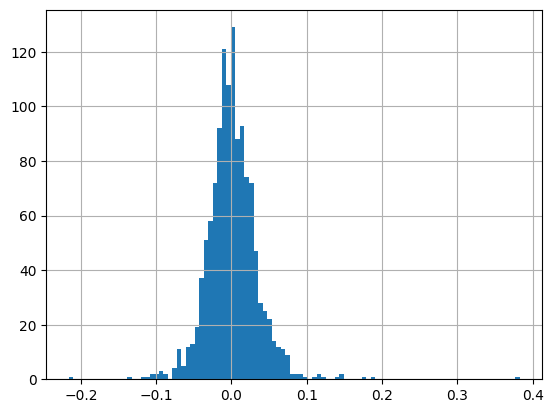

In [80]:
df.Daily_change.hist(bins=100)

Ładniej wygląda za pomocą biblioteki seaborn


<Axes: >

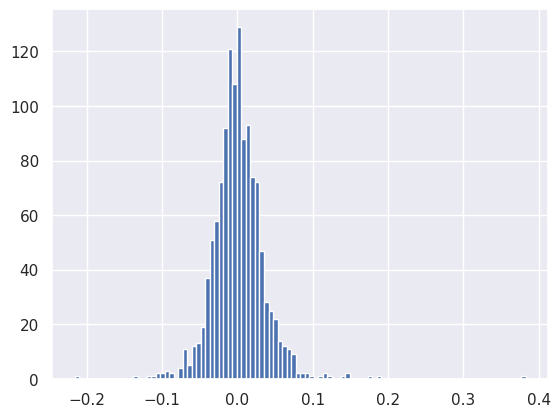

In [81]:
import seaborn as sns
sns.set()

df.Daily_change.hist(bins=100)

> Wyświetlenie wykresu ceny Close
.plot()

<Axes: xlabel='Date'>

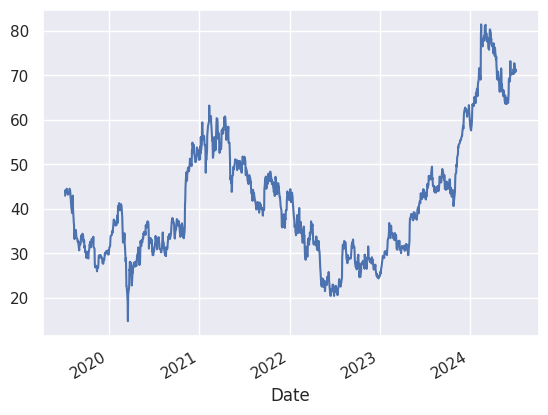

In [82]:
df.Close.plot()

In [84]:
def fetch_financial_data(company='Atos'):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-07-05 to 2019-07-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [85]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1.720921,1.803233,1.644320,1.716511,3.571422e+06
std,1.108634,1.197255,1.037692,1.111672,1.008517e+07
min,0.500000,0.520000,0.500000,0.502000,1.250400e+04
25%,0.910300,0.947650,0.884800,0.911400,2.427560e+05
50%,1.380000,1.430000,1.325000,1.380000,5.867650e+05
75%,2.167500,2.250000,2.059175,2.147500,2.324022e+06
max,8.010000,9.800000,7.920000,8.620000,1.524937e+08


In [88]:
df.Close.min()

0.502

###Filtorwaie danych


In [90]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189
2024-07-03,70.66,72.1400,70.500,71.30,7869781
2024-07-02,71.25,71.2600,68.880,70.67,14318951
2024-07-01,72.20,72.5800,69.400,71.10,13438725
2024-06-28,70.81,73.2600,70.770,72.68,21375880
...,...,...,...,...,...
2019-07-12,44.16,44.2400,43.390,43.99,8760526
2019-07-11,44.10,44.2900,43.310,43.99,8050856
2019-07-10,44.48,44.8000,43.560,43.70,9746505


In [91]:
df ['Average'] = (df.Open + df.Close)/2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189,71.025
2024-07-03,70.66,72.1400,70.500,71.30,7869781,70.980
2024-07-02,71.25,71.2600,68.880,70.67,14318951,70.960
2024-07-01,72.20,72.5800,69.400,71.10,13438725,71.650
2024-06-28,70.81,73.2600,70.770,72.68,21375880,71.745


In [92]:
df["Close_shift"] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189,71.025,NaN
2024-07-03,70.66,72.1400,70.500,71.30,7869781,70.980,71.06
2024-07-02,71.25,71.2600,68.880,70.67,14318951,70.960,71.30
2024-07-01,72.20,72.5800,69.400,71.10,13438725,71.650,70.67
2024-06-28,70.81,73.2600,70.770,72.68,21375880,71.745,71.10


In [93]:
df['Daily_change'] = df.Close / df.Close_shift -1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189,71.025,NaN,NaN
2024-07-03,70.66,72.1400,70.500,71.30,7869781,70.980,71.06,0.003377
2024-07-02,71.25,71.2600,68.880,70.67,14318951,70.960,71.30,-0.008836
2024-07-01,72.20,72.5800,69.400,71.10,13438725,71.650,70.67,0.006085
2024-06-28,70.81,73.2600,70.770,72.68,21375880,71.745,71.10,0.022222


In [94]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189,71.025,NaN,NaN
2024-07-03,70.66,72.1400,70.500,71.30,7869781,70.980,71.06,0.003377
2024-07-02,71.25,71.2600,68.880,70.67,14318951,70.960,71.30,-0.008836
2024-07-01,72.20,72.5800,69.400,71.10,13438725,71.650,70.67,0.006085
2024-06-28,70.81,73.2600,70.770,72.68,21375880,71.745,71.10,0.022222
...,...,...,...,...,...,...,...,...
2019-07-12,44.16,44.2400,43.390,43.99,8760526,44.075,44.53,-0.012127
2019-07-11,44.10,44.2900,43.310,43.99,8050856,44.045,43.99,0.000000
2019-07-10,44.48,44.8000,43.560,43.70,9746505,44.090,43.99,-0.006592


In [95]:
df.Daily_change >0
# to nam daje mapę logiczną

Date
2024-07-05    False
2024-07-03     True
2024-07-02    False
2024-07-01     True
2024-06-28     True
              ...  
2019-07-12    False
2019-07-11    False
2019-07-10    False
2019-07-09     True
2019-07-08    False
Name: Daily_change, Length: 1258, dtype: bool

In [98]:
# aby wyciąć tylko dane >0 robimy taką sztuczkę

df_positive =df[df.Daily_change >0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-07-03,70.66,72.14,70.50,71.30,7869781,70.980,71.06,0.003377
2024-07-01,72.20,72.58,69.40,71.10,13438725,71.650,70.67,0.006085
2024-06-28,70.81,73.26,70.77,72.68,21375880,71.745,71.10,0.022222
2024-06-26,70.94,71.60,70.55,70.85,10232568,70.895,70.34,0.007250
2024-06-25,71.86,72.94,70.22,71.38,18911562,71.620,70.85,0.007481
...,...,...,...,...,...,...,...,...
2019-07-22,43.25,43.72,43.01,43.69,3822276,43.470,43.36,0.007611
2019-07-18,43.50,43.85,43.19,43.71,4123615,43.605,43.18,0.012274
2019-07-16,44.60,44.98,44.02,44.13,5613321,44.365,43.62,0.011692


In [99]:
df_positive.Daily_change.mean()

0.023710508950021636

In [100]:
# aby wyciąć tylko dane <0 robimy taką sztuczkę

df_negative =df[df.Daily_change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-07-02,71.25,71.260,68.88,70.67,14318951,70.960,71.30,-0.008836
2024-06-27,70.98,71.320,70.07,70.34,9650481,70.660,72.68,-0.032196
2024-06-24,69.83,71.230,69.75,70.54,12479277,70.185,71.38,-0.011768
2024-06-21,70.04,70.250,69.23,70.21,20913321,70.125,70.54,-0.004678
2024-06-14,70.91,71.000,69.32,70.06,11601130,70.485,70.49,-0.006100
...,...,...,...,...,...,...,...,...
2019-07-19,43.90,44.086,43.16,43.18,4021018,43.540,43.69,-0.011673
2019-07-17,44.06,44.350,43.52,43.62,5854149,43.840,43.71,-0.002059
2019-07-12,44.16,44.240,43.39,43.99,8760526,44.075,44.53,-0.012127


In [101]:
df_negative.Daily_change.mean()

-0.024020069133196528

In [102]:
# sprawdzamy czy cena Close była najwyższa; w tym celu
df.Close == df.High

Date
2024-07-05    False
2024-07-03    False
2024-07-02    False
2024-07-01    False
2024-06-28    False
              ...  
2019-07-12    False
2019-07-11    False
2019-07-10    False
2019-07-09    False
2019-07-08    False
Length: 1258, dtype: bool

In [105]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,28.34,0.028229
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,58.58,-0.012462
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,53.80,0.019703
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,32.30,-0.034365


In [106]:
df [df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,37.93,-0.009755
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,37.84,-0.010571
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,26.40,-0.032197
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,43.95,-0.045961
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,51.14,-0.002738
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,29.74,0.014459
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.89,-0.007530
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,36.45,0.015089


In [107]:
df.index

DatetimeIndex(['2024-07-05', '2024-07-03', '2024-07-02', '2024-07-01',
               '2024-06-28', '2024-06-27', '2024-06-26', '2024-06-25',
               '2024-06-24', '2024-06-21',
               ...
               '2019-07-19', '2019-07-18', '2019-07-17', '2019-07-16',
               '2019-07-15', '2019-07-12', '2019-07-11', '2019-07-10',
               '2019-07-09', '2019-07-08'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [109]:
df.index > '2024-06-21'
# tworzenie maski logicznej

array([ True,  True,  True, ..., False, False, False])

In [111]:
df[df.index > '2024-06-21']
#  wycięliśmy wszystkie sesje notowań po '2024-06-21'

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-07-05,70.99,71.4177,70.385,71.06,6599189,71.025,NaN,NaN
2024-07-03,70.66,72.1400,70.500,71.30,7869781,70.980,71.06,0.003377
2024-07-02,71.25,71.2600,68.880,70.67,14318951,70.960,71.30,-0.008836
2024-07-01,72.20,72.5800,69.400,71.10,13438725,71.650,70.67,0.006085
2024-06-28,70.81,73.2600,70.770,72.68,21375880,71.745,71.10,0.022222
2024-06-27,70.98,71.3200,70.070,70.34,9650481,70.660,72.68,-0.032196
2024-06-26,70.94,71.6000,70.550,70.85,10232568,70.895,70.34,0.007250
2024-06-25,71.86,72.9400,70.220,71.38,18911562,71.620,70.85,0.007481
2024-06-24,69.83,71.2300,69.750,70.54,12479277,70.185,71.38,-0.011768


In [120]:
df[(df.index >= '2024-06-21') & (df.index < '2024-06-27') ]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-06-26,70.94,71.60,70.55,70.85,10232568,70.895,70.34,0.007250
2024-06-25,71.86,72.94,70.22,71.38,18911562,71.620,70.85,0.007481
2024-06-24,69.83,71.23,69.75,70.54,12479277,70.185,71.38,-0.011768
2024-06-21,70.04,70.25,69.23,70.21,20913321,70.125,70.54,-0.004678


In [121]:
df[(df.index == '2024-06-21') | (df.index == '2024-06-27') ]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-06-27,70.98,71.32,70.07,70.34,9650481,70.660,72.68,-0.032196
2024-06-21,70.04,70.25,69.23,70.21,20913321,70.125,70.54,-0.004678


In [123]:
df.index.month == 5

array([False, False, False, ..., False, False, False])

In [125]:
df[(df.index.month == 5) & (df.index.year == 2024)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-05-31,64.200,64.6300,63.1400,64.56,17322445,64.3800,63.79,0.012071
2024-05-30,64.790,65.4100,63.7200,64.12,12692547,64.4550,64.56,-0.006815
2024-05-29,63.010,65.3650,62.9100,64.93,16987906,63.9700,64.12,0.012633
2024-05-28,64.610,64.6100,63.1000,63.52,14213346,64.0650,64.93,-0.021716
2024-05-24,63.780,64.7600,63.6200,64.26,10385892,64.0200,63.52,0.011650
2024-05-23,65.560,65.8000,63.2500,63.60,20114981,64.5800,64.26,-0.010271
2024-05-22,64.820,66.0900,64.5200,65.48,22562072,65.1500,63.60,0.029560
2024-05-21,64.130,64.6500,63.8100,63.97,16592548,64.0500,65.48,-0.023060
2024-05-20,65.640,65.8700,64.3050,64.65,15864425,65.1450,63.97,0.010630


In [126]:
df[df.index.day_name() == 'Monday']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-07-01,72.20,72.5800,69.4000,71.10,13438725,71.650,70.67,0.006085
2024-06-24,69.83,71.2300,69.7500,70.54,12479277,70.185,71.38,-0.011768
2024-06-17,69.91,70.8300,69.8300,70.49,14760477,70.200,70.33,0.002275
2024-06-10,69.28,69.6913,66.5600,68.60,19168881,68.940,69.59,-0.014226
2024-06-03,64.78,64.9600,62.9350,63.79,14922214,64.285,64.55,-0.011774
...,...,...,...,...,...,...,...,...
2019-08-05,39.35,39.4200,38.4325,39.05,9799269,39.200,39.15,-0.002554
2019-07-29,45.00,45.6270,43.1200,43.88,8652204,44.440,42.59,0.030289
2019-07-22,43.25,43.7200,43.0100,43.69,3822276,43.470,43.36,0.007611
